<a href="https://colab.research.google.com/github/wenchun0731/github-colab/blob/try/no_fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow
import pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Fetched 

In [ ]:
!apt-get install -y tesseract-ocr-eng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!apt-get install -y tesseract-ocr-training

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package tesseract-ocr-training


In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 [-l eng -psm 6] batch.nochop makebox

read_params_file: Can't open [-l
read_params_file: Can't open eng
read_params_file: Can't open -psm
read_params_file: Can't open 6]
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1


In [ ]:
import cv2
img=cv2.imread('/content/車牌.png')
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thr, binary = cv2.threshold(gray_img,127, 256, cv2.THRESH_BINARY)

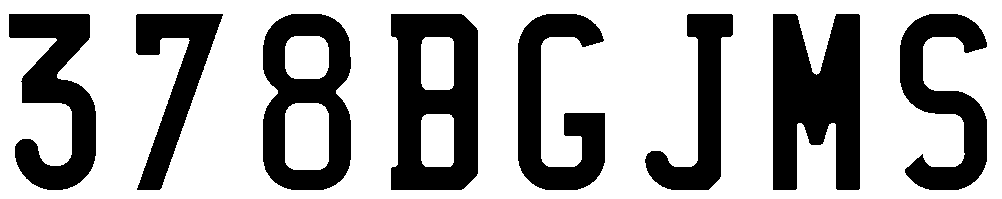

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(binary)

In [ ]:
cv2.imwrite('binary.tif',binary)

True

In [ ]:
text = pytesseract.image_to_string(binary)

In [ ]:
print(text)

In [ ]:

text = pytesseract.image_to_string('/content/binary.tif')
if len(text) ==1:
  print('辨識失敗')
else:
  clean_text = text.strip()#去除兩端不可見字符
  print('辨識結果:\n{}'.format(clean_text))

辨識失敗


In [ ]:
!echo "num_1 0 0 0 0 0" > font_properties

In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 [-l eng -psm 6] nobatch box.train

read_params_file: Can't open [-l
read_params_file: Can't open eng
read_params_file: Can't open -psm
read_params_file: Can't open 6]
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1
FAIL!
APPLY_BOXES: boxfile line 1/~ ((12,20),(708,217)): FAILURE! Couldn't find a matching blob
APPLY_BOXES:
   Boxes read from boxfile:       1
   Boxes failed resegmentation:       1
APPLY_BOXES: Unlabelled word at :Bounding box=(12,20)->(708,217)
   Found 0 good blobs.
   1 remaining unlabelled words deleted.
Generated training data for 0 words


In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 [-l eng -psm 6] nobatch box.train

read_params_file: Can't open [-l
read_params_file: Can't open eng
read_params_file: Can't open -psm
read_params_file: Can't open 6]
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1
FAIL!
APPLY_BOXES: boxfile line 1/3 ((1,24),(121,221)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 2/7 ((138,25),(249,222)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 3/B ((286,20),(404,217)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 4/J ((438,16),(545,213)): FAILURE! Couldn't find a matching blob
FAIL!
APPLY_BOXES: boxfile line 5/M ((601,14),(718,212)): FAILURE! Couldn't find a matching blob
APPLY_BOXES:
   Boxes read from boxfile:       5
   Boxes failed resegmentation:       5
APPLY_BOXES: Unlabelled word at :Bounding box=(12,20)->(708,217)
   Found 0 good blobs.
   1 remaining unlabelled words deleted.
Generated training data for 0 words


In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 -l eng --psm 6 nobatch box.train

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1
APPLY_BOXES:
   Boxes read from boxfile:       5
   Found 5 good blobs.
Generated training data for 1 words


In [ ]:
!unicharset_extractor num.font.exp0.box

Extracting unicharset from box file num.font.exp0.box
Other case b of B is not in unicharset
Other case j of J is not in unicharset
Other case m of M is not in unicharset
Wrote unicharset file unicharset


In [ ]:
!mftraining -F font_properties -U unicharset -O num.unicharset num.font.exp0.tr

Reading num.font.exp0.tr ...
Flat shape table summary: Number of shapes = 5 max unichars = 1 number with multiple unichars = 0
Done!


In [ ]:
!cntraining num.font.exp0.tr

Reading num.font.exp0.tr ...
Clustering ...

Writing normproto ...


In [ ]:
!combine_tessdata num.

Combining tessdata files
Output num.traineddata created successfully.
Version string:4.1.1
1:unicharset:size=442, offset=192
3:inttemp:size=122607, offset=634
4:pffmtable:size=75, offset=123241
5:normproto:size=782, offset=123316
13:shapetable:size=94, offset=124098
23:version:size=5, offset=124192


In [ ]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [ ]:
# 创建一个目录用于存放训练数据
!mkdir -p /content/tessdata/

# 将自定义训练数据复制到指定目录
!cp /content/num.traineddata /content/tessdata/

In [ ]:
#设置 TESSDATA_PREFIX 环境变量
!export TESSDATA_PREFIX="/content/tessdata/"

In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 -l eng --psm 6 lstm.train

read_params_file: Can't open lstm.train
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Page 1


In [ ]:
!combine_tessdata -e '/content/tessdata/eng.traineddata' eng.lstm

Extracting tessdata components from /content/tessdata/eng.traineddata
Wrote eng.lstm
Version string:Pre-4.0.0
1:unicharset:size=7477, offset=192
2:unicharambigs:size=1047, offset=7669
3:inttemp:size=976552, offset=8716
4:pffmtable:size=844, offset=985268
5:normproto:size=13408, offset=986112
6:punc-dawg:size=4322, offset=999520
7:word-dawg:size=1082890, offset=1003842
8:number-dawg:size=6426, offset=2086732
9:freq-dawg:size=1410, offset=2093158
11:cube-unicharset:size=1511, offset=2094568
12:cube-word-dawg:size=1062106, offset=2096079
13:shapetable:size=63346, offset=3158185
14:bigram-dawg:size=16109842, offset=3221531
17:lstm:size=5390718, offset=19331373
18:lstm-punc-dawg:size=4322, offset=24722091
19:lstm-word-dawg:size=7143578, offset=24726413
20:lstm-number-dawg:size=3530, offset=31869991
23:version:size=9, offset=31873521


In [ ]:
!tesseract --versio

Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


In [ ]:
!apt-get upgrade -y tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn8 libcudnn8-dev libnccl-dev libnccl2
The following packages will be upgraded:
  base-files bash binutils binutils-common binutils-x86-64-linux-gnu bsdutils coreutils
  cuda-compat-12-2 cuda-keyring cuda-toolkit-12-config-common cuda-toolkit-config-common dpkg
  dpkg-dev libbinutils libblkid1 libc-bin libctf-nobfd0 libctf0 libdpkg-perl libgnutls30
  libldap-2.5-0 libmount1 libpam-modules libpam-modules-bin libpam-runtime libpam0g libperl5.34
  libprocps8 libsmartcols1 libudev1 linux-libc-dev login mount openssl passwd perl perl-base
  perl-modules-5.34 procps tar util-linux
41 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Need to get 59.6 MB of archives.
After this operation, 85.0 kB of additional disk space will be used.
Get:1 http:/

In [ ]:
!ls /usr/share/tesseract-ocr/4.00/tessdata/  # 检查语言数据

configs  eng.traineddata  osd.traineddata  pdf.ttf  tessconfigs


In [ ]:
!tesseract num.font.exp0.tif num.font.exp0 -l 'eng.traineddata' --psm 6 lstm.train

Error opening data file /content/tessdata/eng.traineddata.traineddata
Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory.
Failed loading language 'eng.traineddata'
Tesseract couldn't load any languages!
Could not initialize tesseract.
